# CS6220_finalProject
Team: haixiangzhang-yuqiaofeng-weimengduan
<br>
# Predictive Modeling on Bank Marketing Dataset
<br><br>
## Table of Contents
1. [Introduction](#1.-Introduction)
2. [Problem Statement](#2.-Problem-Statement)
3. [Dataset Description](#3.-Dataset-Description)
4. [EDA and Data Reprocessing](#4.-EDA-and-Data-Reprocessing)   
    4.1 [Import Libraries and Load Data](#4.1-Import-Libraries-and-Load-Data)   
    4.2 [Data Cleaning and EDA](#4.2-Data-Cleaning-and-EDA)     
    4.3 [Data Standardization](#4.3-Data-Standardization)       
    4.4 [Data Imbalance Handling](#4.4-Data-Imbalance-Handling)     
    4.5 [Data Splitting](#4.5-Data-Splitting)   
5. [Model Training and Evaluation](#5.-Model-Training-and-Evaluation)   
    5.1 [Model 1: Random Forest](#5.1-Model-1:-Random-Forest)   
    5.2 [Model 2: XGBoost](#5.2-Model-2:-XGBoost)       
    5.3 [Model 3: Logistic Regression](#5.3-Model-3:-Logistic-Regression)       
    5.4 [Model 4: AdaBoost](#5.4-Model-4:-AdaBoost)     
6. [Model Selection](#6.-Model-Selection)

<br><br>

## 1. Introduction
The objective of this project is to perform an in-depth exploratory data analysis (EDA) and develop predictive models on the Bank Marketing dataset. This dataset contains information related to direct marketing campaigns of a Portuguese banking institution, with the primary goal of predicting whether a client will subscribe to a term deposit. The project aims to gain insights into customer behavior, demographics, and economic indicators and build predictive models to improve campaign efficiency.

## 2. Problem Statement
The goal of this analysis is to predict whether a client will subscribe to a term deposit (variable 'y') based on various demographic and marketing-related features. The problem is to create a predictive model that can accurately classify potential clients as subscribers ('yes') or non-subscribers ('no').

## 3. Dataset Description
- Dataset Name: Bank Marketing
- Source: UCI Machine Learning Repository
- Dataset Link: [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)
- Subject Area: Business. This is a Bank Marketing dataset. This dataset contains information related to direct marketing campaigns of a Portuguese banking institution.
- Data dictionary: This data set contains 45211 instances and 16 features, and feature types include categorical and integer. Please refer to the detailed dictionary below for each feature.

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
| --- | --- | --- | --- | --- | --- | --- |
| age | Feature | Integer | Age | | | no |
| job | Feature | Categorical | Occupation | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | | no |
| marital | Feature | Categorical | Marital Status | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | | no |
| education | Feature | Categorical | Education Level | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | | no |
| default | Feature | Binary | | has credit in default? | | no |
| balance | Feature | Integer | | average yearly balance | euros | no |
| housing | Feature | Binary | | has housing loan? | | no |
| loan | Feature | Binary | | has personal loan? | | no |
| contact | Feature | Categorical | | contact communication type (categorical: 'cellular','telephone') | | yes |
| day_of_week | Feature | Date | | last contact day of the week | | no |
| month | Feature | Date | | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') | | no |
| duration | Feature | Integer | | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. | | no |
| campaign | Feature | Integer | | number of contacts performed during this campaign and for this client (numeric, includes last contact) | | no |
| pdays | Feature | Integer | | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) | | yes |
| previous | Feature | Integer | | number of contacts performed before this campaign and for this client | | no |
| poutcome | Feature | Categorical | | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') | | yes |
| y | Target | Binary | | has the client subscribed a term deposit? | | no |


## 4. EDA and Data Reprocessing
### 4.1 Import Libraries and Load Data

In [5]:
## imports libraries ##
import numpy as np
import pandas as pd
from scipy import stats
from typing import Dict, Any
from abc import ABC,abstractmethod

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import mean_squared_error,\
                            mean_absolute_error,\
                            accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            make_scorer
from scipy import optimize
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler

from joblib import dump, load


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/zhihaowang/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [127]:
## load data ##
# Read data from UCI data website url
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

### 4.2 Data Cleaning and EDA

In [189]:
# Create a dataframe
df = pd.concat([X, y], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [191]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [192]:
# drop duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(45211, 17)
(45211, 17)


In [193]:
# drop 'poutcome' column
print(df.shape)
df.drop('poutcome', axis=1, inplace=True)
print(df.shape)

(45211, 17)
(45211, 16)


In [194]:
# convert 'yes' and 'no' to 1 and 0
df.y.replace(('yes', 'no'), (1, 0), inplace=True)

# rename columns properly
df.rename(columns={'y':'subscribed', 'default':'has_credit'}, inplace=True)
df.rename(columns={'contact':'contact_type'}, inplace=True)
df.rename(columns={'housing':'has_housing_loan', 'loan':'has_personal_loan'}, inplace=True)
df.rename(columns={'balance':'average_yearly_balance'}, inplace=True)
df.rename(columns={'campaign':'campaign_contacts_number'}, inplace=True)
df.rename(columns={'previous':'previous_contacts_number'}, inplace=True)
df.rename(columns={'duration':'last_duration'}, inplace=True)
df.rename(columns={'pdays':'days_since_last_contact'}, inplace=True)
df.rename(columns={'day_of_week':'last_contact_date'}, inplace=True)


df.head()

,age,job,marital,education,has_credit,average_yearly_balance,has_housing_loan,has_personal_loan,contact_type,last_contact_date,month,last_duration,campaign_contacts_number,days_since_last_contact,previous_contacts_number,subscribed
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,0


In [195]:
# drop missing values
print(df.shape)
df.dropna(inplace=True)
print(df.shape)
df = df.reset_index(drop=True)
df.info()


(45211, 16)
(30907, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       30907 non-null  int64 
 1   job                       30907 non-null  object
 2   marital                   30907 non-null  object
 3   education                 30907 non-null  object
 4   has_credit                30907 non-null  object
 5   average_yearly_balance    30907 non-null  int64 
 6   has_housing_loan          30907 non-null  object
 7   has_personal_loan         30907 non-null  object
 8   contact_type              30907 non-null  object
 9   last_contact_date         30907 non-null  int64 
 10  month                     30907 non-null  object
 11  last_duration             30907 non-null  int64 
 12  campaign_contacts_number  30907 non-null  int64 
 13  days_since_last_contact   30907 non-null  int64 
 14

In [196]:
# check for missing values
df.isnull().sum()

age                         0
job                         0
marital                     0
education                   0
has_credit                  0
average_yearly_balance      0
has_housing_loan            0
has_personal_loan           0
contact_type                0
last_contact_date           0
month                       0
last_duration               0
campaign_contacts_number    0
days_since_last_contact     0
previous_contacts_number    0
subscribed                  0
dtype: int64

In [199]:
df.last_contact_date = df.last_contact_date.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       30907 non-null  int64 
 1   job                       30907 non-null  object
 2   marital                   30907 non-null  object
 3   education                 30907 non-null  object
 4   has_credit                30907 non-null  object
 5   average_yearly_balance    30907 non-null  int64 
 6   has_housing_loan          30907 non-null  object
 7   has_personal_loan         30907 non-null  object
 8   contact_type              30907 non-null  object
 9   last_contact_date         30907 non-null  object
 10  month                     30907 non-null  object
 11  last_duration             30907 non-null  int64 
 12  campaign_contacts_number  30907 non-null  int64 
 13  days_since_last_contact   30907 non-null  int64 
 14  previous_contacts_numb

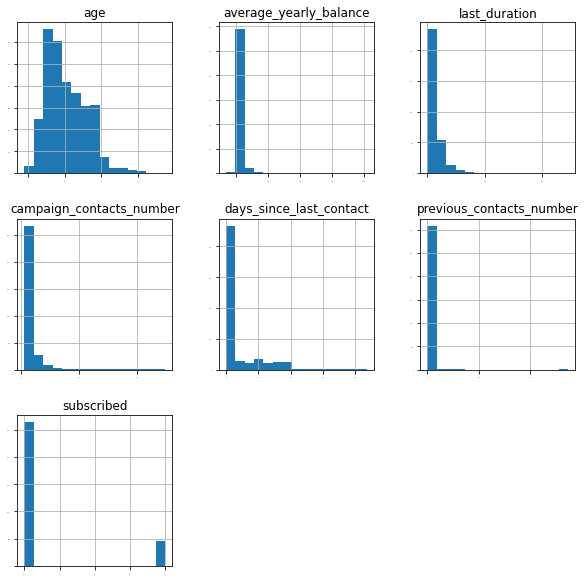

In [200]:
# distribution of numerical features
df.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

We will print distributions of every feature next for feature selection.

In [201]:
df.days_since_last_contact.value_counts(normalize=True)

-1      0.746109
 182    0.004886
 92     0.004465
 183    0.003883
 91     0.003721
          ...   
 25     0.000032
 409    0.000032
 425    0.000032
 489    0.000032
 831    0.000032
Name: days_since_last_contact, Length: 530, dtype: float64

pdays variable has the value -1 81% of the time. The variable gives little information since its variance is very low. It is better to drop this variable. But we will keep it for now since '-1' means the client was not previously contacted.

In [202]:
df.previous_contacts_number.value_counts(normalize=True)

0      0.746109
1      0.085353
2      0.064128
3      0.035235
4      0.022293
5      0.014172
6      0.008509
7      0.006180
8      0.004109
9      0.002847
10     0.002038
11     0.001909
12     0.001294
13     0.001165
15     0.000647
14     0.000615
17     0.000485
16     0.000421
19     0.000356
20     0.000259
23     0.000259
18     0.000194
22     0.000194
24     0.000162
29     0.000129
27     0.000129
25     0.000129
30     0.000097
21     0.000097
28     0.000065
38     0.000065
37     0.000065
26     0.000065
58     0.000032
40     0.000032
35     0.000032
275    0.000032
32     0.000032
51     0.000032
55     0.000032
Name: previous_contacts_number, dtype: float64

Variable 'previous' has the value 0 81% of the time. But the variable gives information that 0 represents this client has not been contacted before this campaign. We will keep this variable.

In [203]:
pd.crosstab(df['has_credit'], df.subscribed, normalize='index')

subscribed,0,1
has_credit,,
no,0.852650,0.147350
yes,0.933333,0.066667


In [204]:
df.subscribed.value_counts(normalize=True)

0    0.853981
1    0.146019
Name: subscribed, dtype: float64

Looking at the proportion of the classes we like to predict, we see that the dataset is imbalanced. We will take care of this problem with oversampling method.

<AxesSubplot:>

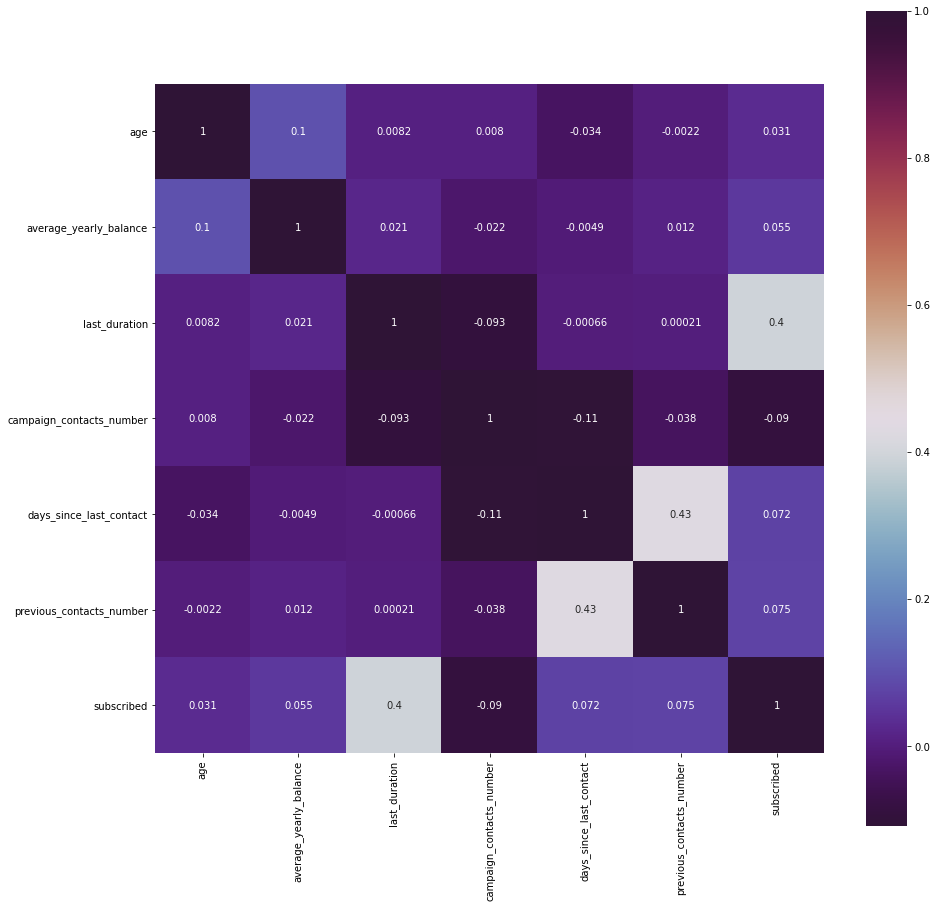

In [205]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,annot=True,cmap= 'twilight_shifted')

In [206]:
df

,age,job,marital,education,has_credit,average_yearly_balance,has_housing_loan,has_personal_loan,contact_type,last_contact_date,month,last_duration,campaign_contacts_number,days_since_last_contact,previous_contacts_number,subscribed
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,0
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,0
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,0
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,0
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
30903,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
30904,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
30905,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


### 4.3 Data Standardization

In [211]:
categorical_columns = df.select_dtypes(include='object')
categorical_list = categorical_columns.columns.tolist()

categorical_list

['job',
 'marital',
 'education',
 'has_credit',
 'has_housing_loan',
 'has_personal_loan',
 'contact_type',
 'last_contact_date',
 'month']

In [212]:
columns = df.columns.tolist()
numerical_list = list(set(columns) - set(categorical_list) - set(['subscribed']))

numerical_list


['days_since_last_contact',
 'average_yearly_balance',
 'campaign_contacts_number',
 'age',
 'previous_contacts_number',
 'last_duration']

In [215]:
set(categorical_list) == set(columns) - set(['subscribed']) - set(numerical_list)

True

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       30907 non-null  int64 
 1   job                       30907 non-null  object
 2   marital                   30907 non-null  object
 3   education                 30907 non-null  object
 4   has_credit                30907 non-null  object
 5   average_yearly_balance    30907 non-null  int64 
 6   has_housing_loan          30907 non-null  object
 7   has_personal_loan         30907 non-null  object
 8   contact_type              30907 non-null  object
 9   last_contact_date         30907 non-null  object
 10  month                     30907 non-null  object
 11  last_duration             30907 non-null  int64 
 12  campaign_contacts_number  30907 non-null  int64 
 13  days_since_last_contact   30907 non-null  int64 
 14  previous_contacts_numb

In [217]:
# standardization for just numerical variables 
scaler=StandardScaler()
scaler.fit(df[numerical_list])
scaled_df=scaler.transform(df[numerical_list])
scaled_df=pd.DataFrame(scaled_df,columns=numerical_list)
scaled_df


,days_since_last_contact,average_yearly_balance,campaign_contacts_number,age,previous_contacts_number,last_duration
0,-0.505165,-0.435850,-0.592790,-1.274345,-0.298763,-0.021278
1,-0.505165,-0.300779,-0.592790,1.197637,-0.298763,0.141652
2,-0.505165,-0.413913,-0.254308,0.190533,-0.298763,1.580865
3,-0.505165,-0.440864,-0.254308,-0.908126,-0.298763,-0.758341
4,-0.505165,-0.407332,0.422657,-1.274345,-0.298763,0.680872
...,...,...,...,...,...,...
30902,-0.505165,-0.188272,0.084174,0.922973,-0.298763,2.779562
30903,-0.505165,0.095032,-0.254308,2.754071,-0.298763,0.758457
30904,1.135995,1.344203,0.761139,2.845626,0.809833,3.361454
30905,-0.505165,-0.237474,0.422657,1.472302,-0.298763,0.960180


In [218]:
scaled_df = scaled_df.join(df['subscribed'])
scaled_df

,days_since_last_contact,average_yearly_balance,campaign_contacts_number,age,previous_contacts_number,last_duration,subscribed
0,-0.505165,-0.435850,-0.592790,-1.274345,-0.298763,-0.021278,0
1,-0.505165,-0.300779,-0.592790,1.197637,-0.298763,0.141652,0
2,-0.505165,-0.413913,-0.254308,0.190533,-0.298763,1.580865,0
3,-0.505165,-0.440864,-0.254308,-0.908126,-0.298763,-0.758341,0
4,-0.505165,-0.407332,0.422657,-1.274345,-0.298763,0.680872,0
...,...,...,...,...,...,...,...
30902,-0.505165,-0.188272,0.084174,0.922973,-0.298763,2.779562,1
30903,-0.505165,0.095032,-0.254308,2.754071,-0.298763,0.758457,1
30904,1.135995,1.344203,0.761139,2.845626,0.809833,3.361454,1
30905,-0.505165,-0.237474,0.422657,1.472302,-0.298763,0.960180,0


In [221]:
# one hot encoding for categorical variables
dummies_df= pd.get_dummies(df[categorical_list], columns = categorical_list, drop_first=True)
dummies_df.head()


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [222]:
standard_df = pd.concat([dummies_df,scaled_df], axis=1)

standard_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,days_since_last_contact,average_yearly_balance,campaign_contacts_number,age,previous_contacts_number,last_duration,subscribed
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,-0.505165,-0.435850,-0.592790,-1.274345,-0.298763,-0.021278,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.505165,-0.300779,-0.592790,1.197637,-0.298763,0.141652,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.505165,-0.413913,-0.254308,0.190533,-0.298763,1.580865,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-0.505165,-0.440864,-0.254308,-0.908126,-0.298763,-0.758341,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-0.505165,-0.407332,0.422657,-1.274345,-0.298763,0.680872,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0,0,0,0,0,0,0,0,1,0,...,1,0,0,-0.505165,-0.188272,0.084174,0.922973,-0.298763,2.779562,1
30903,0,0,0,0,1,0,0,0,0,0,...,1,0,0,-0.505165,0.095032,-0.254308,2.754071,-0.298763,0.758457,1
30904,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1.135995,1.344203,0.761139,2.845626,0.809833,3.361454,1
30905,1,0,0,0,0,0,0,0,0,0,...,1,0,0,-0.505165,-0.237474,0.422657,1.472302,-0.298763,0.960180,0


### 4.4 Data Imbalance Handling

In [223]:
# deal with imbalanced data
from imblearn.over_sampling import SMOTE

# Separate the features and target variable
X_imbalanced = standard_df.drop('subscribed', axis=1)
y_imbalanced = standard_df['subscribed']

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_imbalanced, y_imbalanced)

# Create a new balanced dataframe
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution
balanced_df.subscribed.value_counts(normalize=True)

0    0.5
1    0.5
Name: subscribed, dtype: float64

In [227]:
# data shape after oversampling
balanced_df.shape

(52788, 66)

In [ ]:
# feature importance
correlation = balanced_df.corrwith(balanced_df['subscribed'])
correlation = correlation.sort_values(ascending=False) 
correlation

subscribed                  1.000000
last_duration               0.436459
previous_contacts_number    0.097073
month_jun                   0.095309
job_retired                 0.090926
                              ...   
job_blue-collar            -0.146229
campaign_contacts_number   -0.165028
month_jul                  -0.170877
has_personal_loan_yes      -0.213635
has_housing_loan_yes       -0.262668
Length: 66, dtype: float64

### 4.5 Data Splitting

In [229]:
# store X and y
X_array = balanced_df.drop('subscribed', axis=1).values
y_array = balanced_df['subscribed'].values

# split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

## 5. Model Training and Evaluation

#### 5.1 Model 1: Random Forest

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# evaluation summary
evaluation_summary = {}
evaluation_summary['Random Forest'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': conf_matrix}

# Save the trained models
dump(clf, 'random_forest_model.pkl')


Confusion Matrix:
[[4790  497]
 [ 253 5018]]
Accuracy: 0.9289638189050957
Precision: 0.9098821396192203
Recall: 0.9520015177385696
F1 Score: 0.9304654181346189


['random_forest_model.pkl']

### 5.2 Model 2: XGBoost

In [248]:
from xgboost import XGBClassifier

# Create and train the XGBoost Classifier
clf = XGBClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# evaluation summary
evaluation_summary['XGBoost'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': conf_matrix}

dump(clf, 'xgboost_model.pkl')


Confusion Matrix:
[[4785  502]
 [ 339 4932]]
Accuracy: 0.9203447622655806
Precision: 0.9076186970923813
Recall: 0.935685828116107
F1 Score: 0.9214385801027557


['xgboost_model.pkl']

### 5.3 Model 3: Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression Classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# evaluation summary
evaluation_summary['Logistic Regression'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': conf_matrix}

dump(clf, 'logistic_regression_model.pkl')


Confusion Matrix:
[[4767  520]
 [ 679 4592]]
Accuracy: 0.8864368251562796
Precision: 0.8982785602503912
Recall: 0.8711819389110226
F1 Score: 0.884522777617259


['logistic_regression_model.pkl']

### 5.4 Model 4: AdaBoost

In [250]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost Classifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# evaluation summary
evaluation_summary['AdaBoost'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': conf_matrix}

dump(clf, 'adaboost_model.pkl')

Confusion Matrix:
[[4580  707]
 [ 624 4647]]
Accuracy: 0.8739344572835764
Precision: 0.8679491968621591
Recall: 0.8816163915765509
F1 Score: 0.8747294117647059


['adaboost_model.pkl']

## 6. Model Selection

In [251]:
# Convert evaluation_summary to dataframe
df_evaluation_summary = pd.DataFrame.from_dict(evaluation_summary, orient='index')

# Print the evaluation summary dataframe
df_evaluation_summary


,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Random Forest,0.928964,0.909882,0.952002,0.930465,"[[4790, 497], [253, 5018]]"
XGBoost,0.920345,0.907619,0.935686,0.921439,"[[4785, 502], [339, 4932]]"
Logistic Regression,0.886437,0.898279,0.871182,0.884523,"[[4767, 520], [679, 4592]]"
AdaBoost,0.873934,0.867949,0.881616,0.874729,"[[4580, 707], [624, 4647]]"


Based on the evaluation metrics, we will select the best model for this dataset. The best model is the one with the highest accuracy and lowest false positive rate. In this case, the best model is the Random Forest model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# 处理不均衡类别
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 创建GradientBoostingClassifier模型
md1 = GradientBoostingClassifier(random_state=0)

# 定义超参数搜索空间
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.5, 1.0]
}

# 使用GridSearchCV进行超参数调整
grid = GridSearchCV(estimator=md1, param_grid=params, cv=5)
grid.fit(X_train, y_train)

# 获取最佳模型
best_model = grid.best_estimator_

# 使用最佳模型进行预测
y_pred = best_model.predict(X_test)

# 计算分类准确度和其他指标
classification_accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Classification Accuracy:", classification_accuracy)
print("Classification Report:\n", classification_report_output)
print("Best Parameters:", grid.best_params_)
